#                 SuperStore Sales Analysis

# Objective

Upon initial inspection of the data,we can start thinking some questions it want to answer.

- what is the sales for top 10 states
- what is the profit for top 10 states
- Which is the Most Profitable Sub_category
- Which is the Most sold category
- Which is most of the shipmode 
- What is the most profitable cutomer segment
- What is the most Profitable Region
- Which city has the highest Sales Volume


In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Sample - Superstore.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(9994, 21)

In [4]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
#check for null values
pd.isnull(df).sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
# describe() method returns description of the data in the DataFrame 
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Exploring Data Anyalysis

# State

<Axes: xlabel='State', ylabel='Sales'>

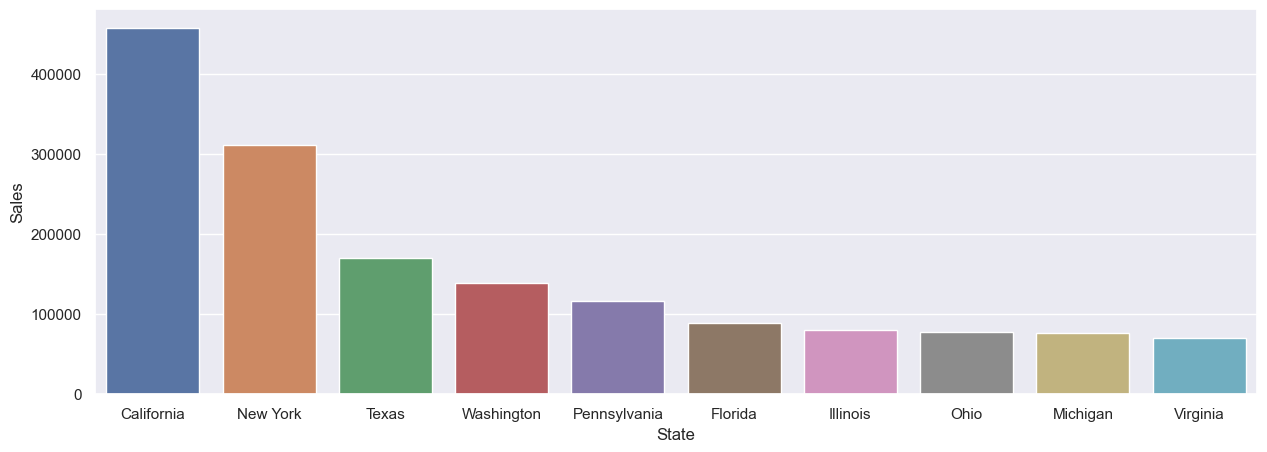

In [9]:
# total number of sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Sales')

From above graph we can see that most of sales is from California, New York,Texas.

<Axes: xlabel='State', ylabel='Profit'>

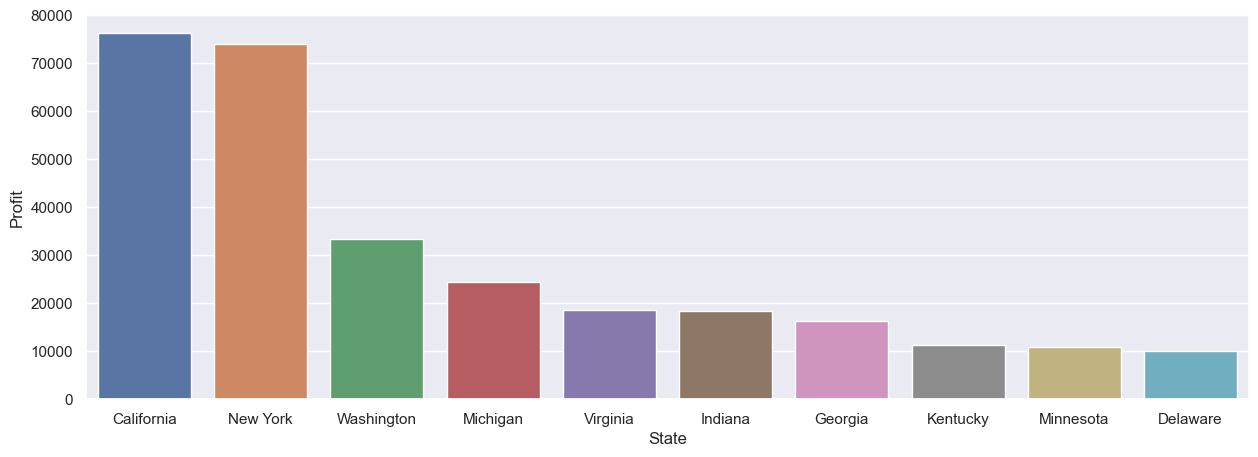

In [10]:
# total number of profit from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Profit')

From above graph we can see that most of profit is from California, New York, Washington.

# Which is the Most Profitable Sub_category

In [11]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [12]:
sub_categories_info=pd.DataFrame(df.groupby("Sub-Category")["Profit"].sum())
sub_categories_info.reset_index(inplace=True)
sub_categories_profit=sub_categories_info.sort_values(by="Profit",ascending=False)
sub_categories_profit.head(10)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


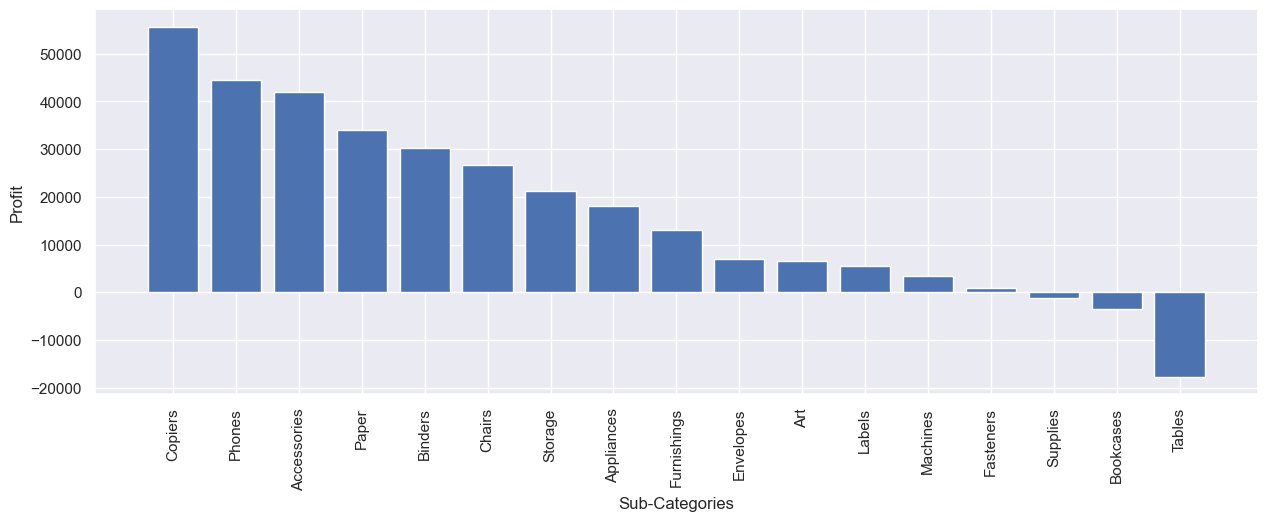

In [13]:
import matplotlib.pyplot as plt
plt.bar(sub_categories_profit["Sub-Category"],sub_categories_profit["Profit"])
plt.xticks(sub_categories_profit['Sub-Category'] , rotation = "vertical")
plt.xlabel("Sub-Categories")
plt.ylabel("Profit")
plt.show()


# 

# Product Category

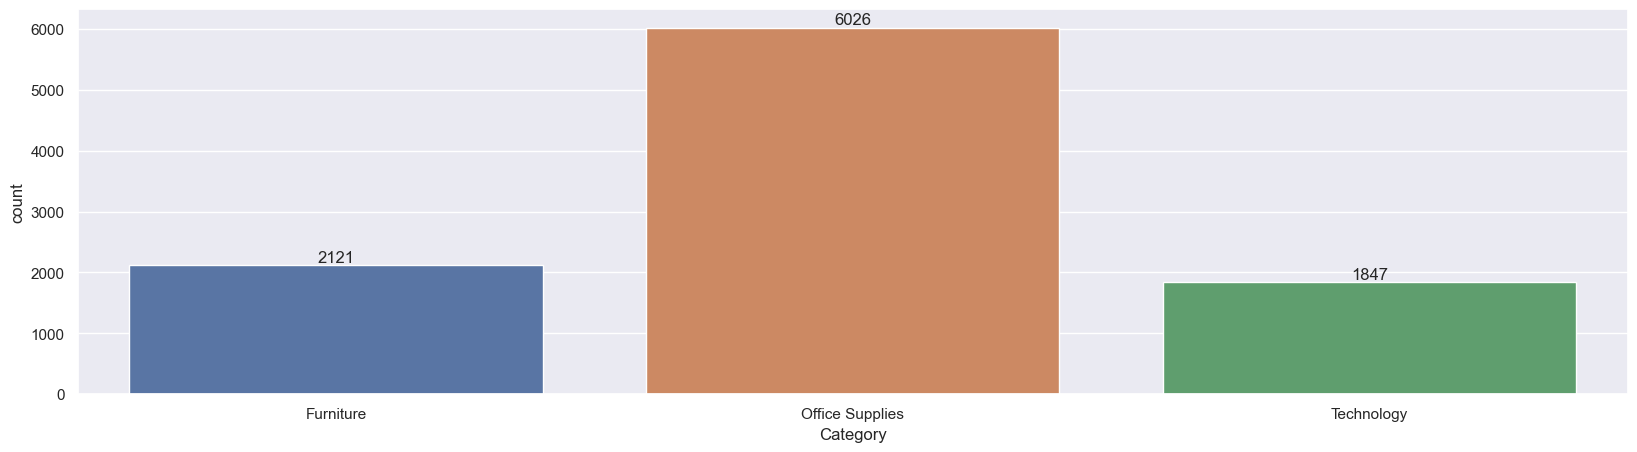

In [14]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Category', ylabel='Quantity'>

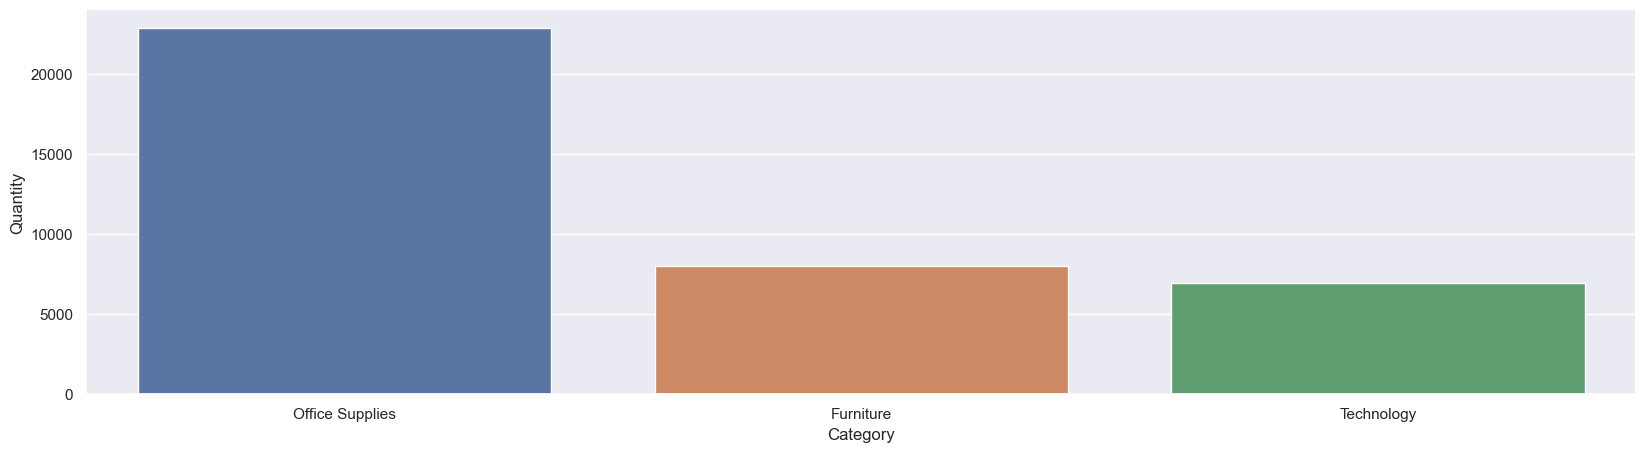

In [15]:
sales_state = df.groupby(['Category'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Category',y= 'Quantity')

*From above graphs we can see that most of the sold products are from Office supply,Furniture,Technology category*

# Ship Mode

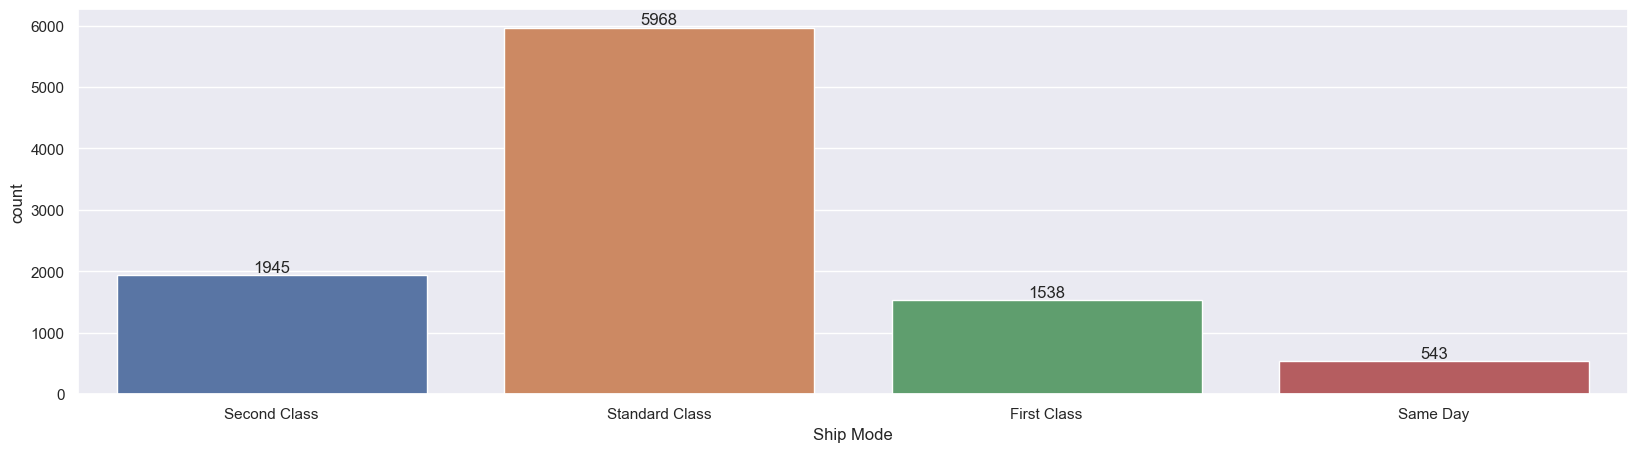

In [16]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Ship Mode')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Ship Mode', ylabel='Quantity'>

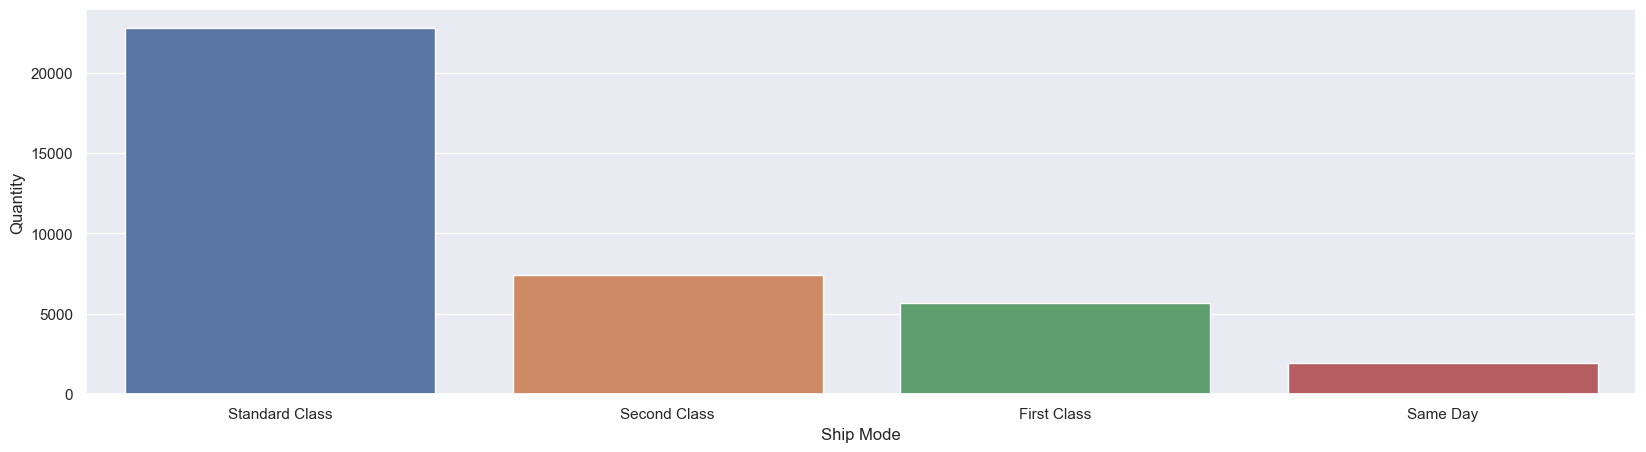

In [17]:
sales_state = df.groupby(['Ship Mode'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Ship Mode',y= 'Quantity')

*From above graphs we can see that most of the shipmode is by standard class*

# What is the most profitable cutomer segment

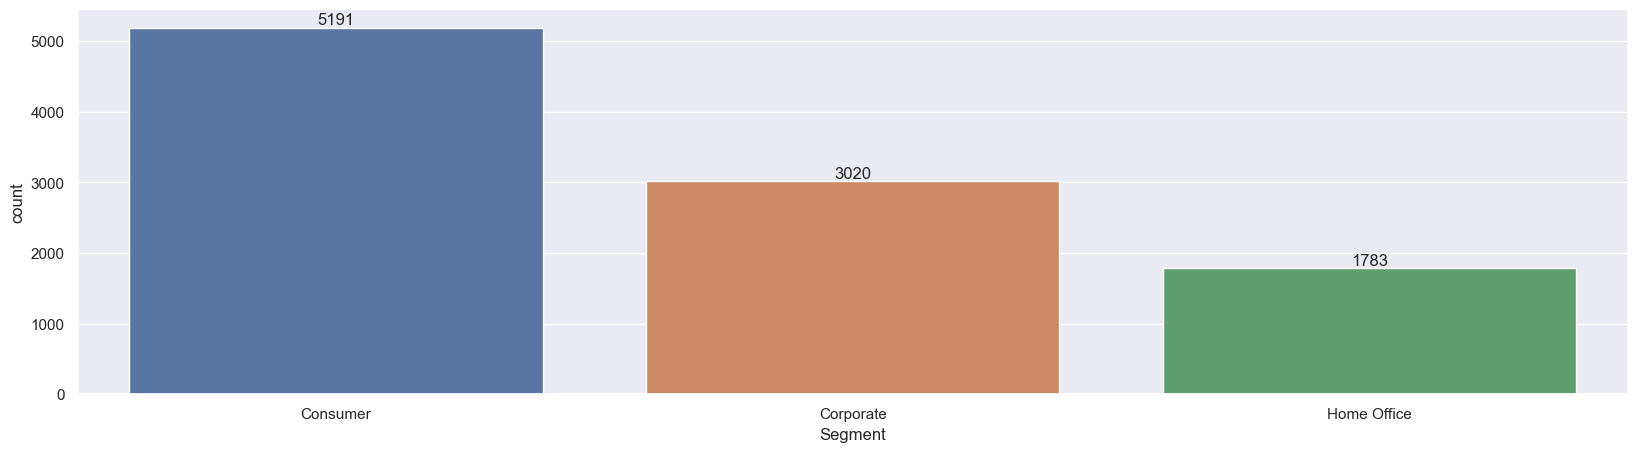

In [18]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Segment')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Segment', ylabel='Profit'>

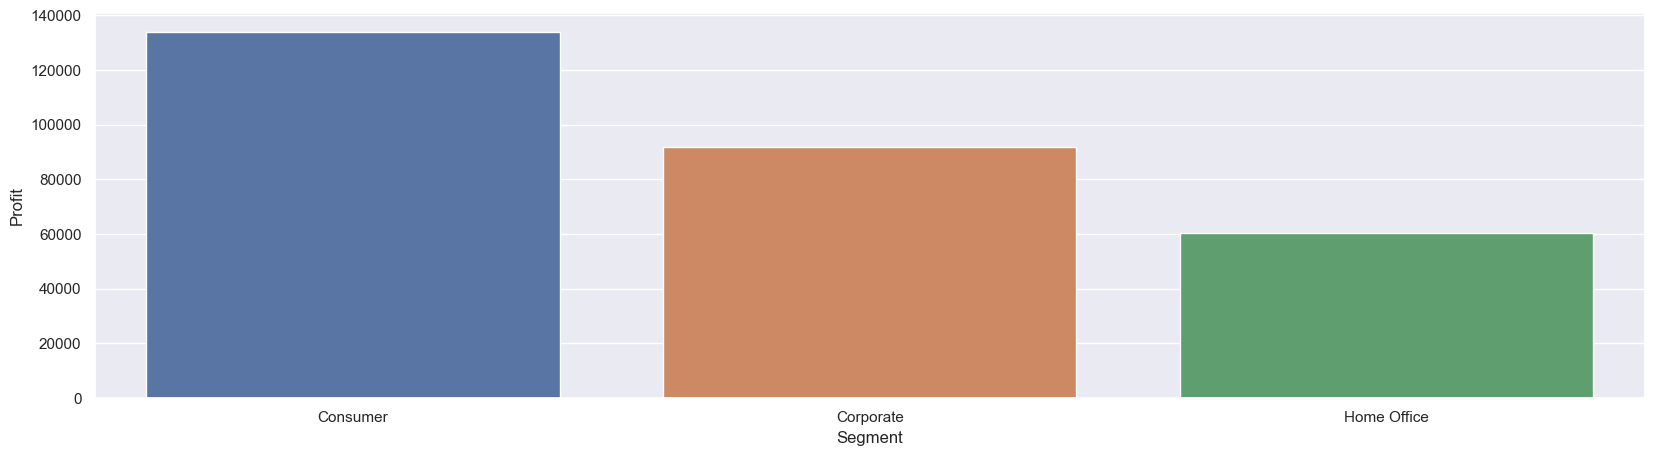

In [19]:
sales_state = df.groupby(['Segment'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Segment',y= 'Profit')

# What is the most Profitable Region

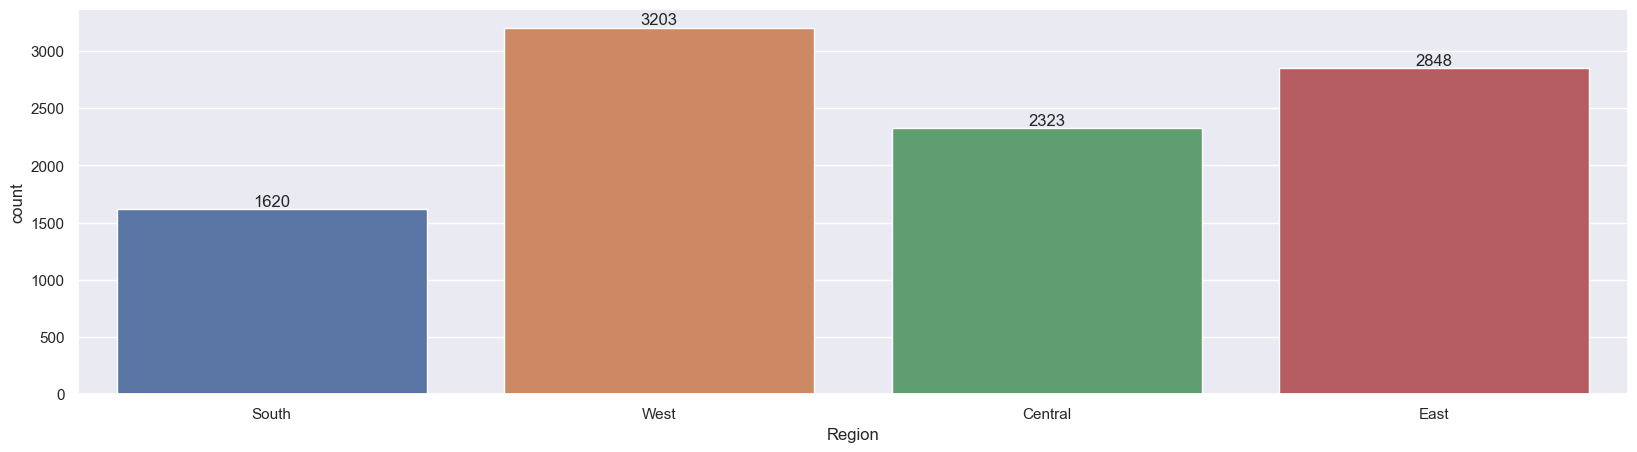

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Region')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Region', ylabel='Profit'>

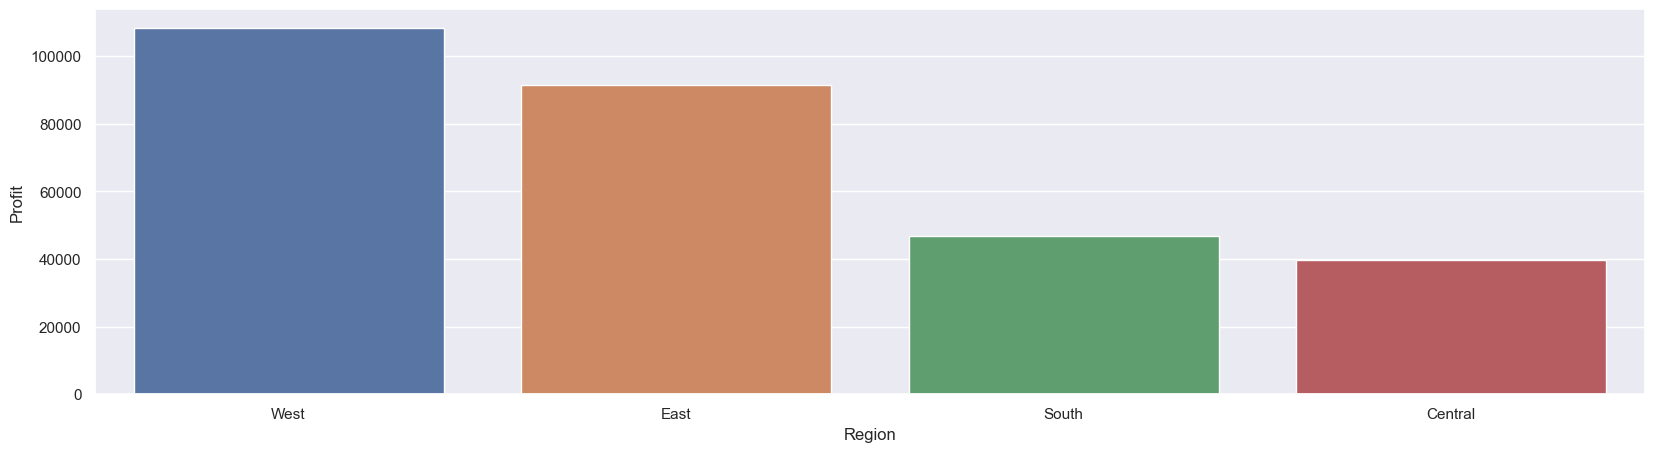

In [21]:
sales_state = df.groupby(['Region'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Region',y= 'Profit')

*From above graphs we can see that most of the profit is from west region*

# Which city has the highest Sales Volume

In [22]:
city_volume = pd.DataFrame(df.groupby('City')['Sales'].sum())
city_volume =city_volume.sort_values(by="Sales",ascending=False)
city_volume.head()

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


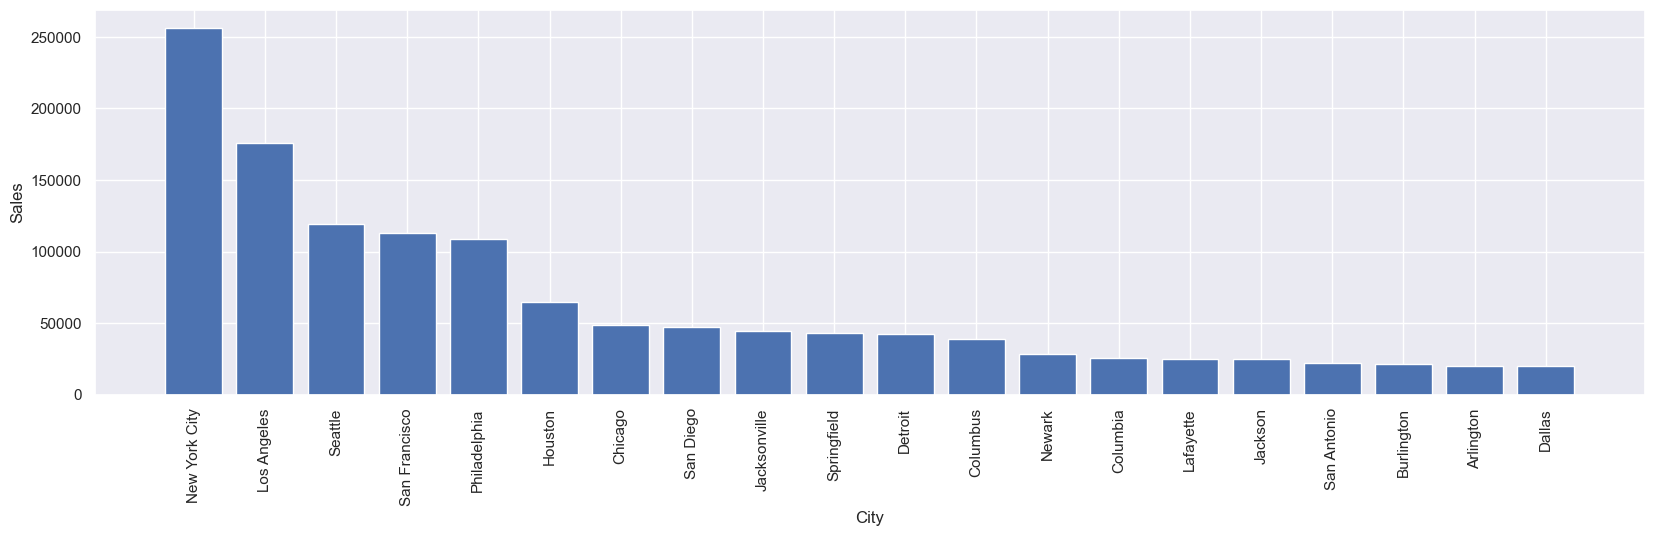

In [23]:
plt.bar(city_volume.index[0:20], city_volume['Sales'][0:20])
plt.xticks(city_volume.index[0:20],rotation = 'vertical')
plt.xlabel("City" )
plt.ylabel("Sales")
plt.show()

# WHICH ARE THE MOST SELLING PRODUCTS?

In [24]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('Product Name').sum()['Quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['Quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20300\1065829994.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_selling_prods = pd.DataFrame(df.groupby('Product Name').sum()['Quantity'])


,Quantity
Product Name,
Staples,215
Staple envelope,170
Easy-staple paper,150
Staples in misc. colors,86
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64


In [25]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20300\111131736.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prod_sales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])


,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


# Now, we can prepare the data for the linear regression model

In [26]:
# create a new simple dataframe using the existing one
new_df = df[['Profit', 'Sales']]
new_df


,Profit,Sales
0,41.9136,261.9600
1,219.5820,731.9400
2,6.8714,14.6200
3,-383.0310,957.5775
4,2.5164,22.3680
...,...,...
9989,4.1028,25.2480
9990,15.6332,91.9600
9991,19.3932,258.5760
9992,13.3200,29.6000


<Axes: xlabel='Profit', ylabel='Sales'>

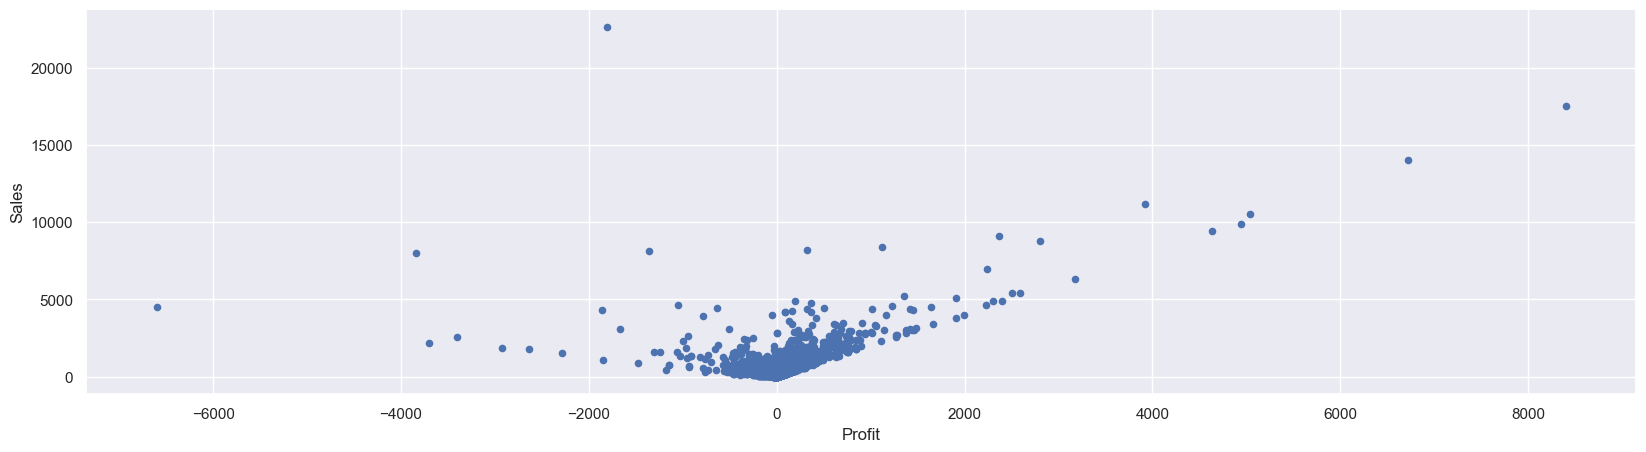

In [27]:
# check the distribution of data by plotting as scatter
new_df.plot(x='Profit', y='Sales', kind='scatter')

<Axes: xlabel='Quantity', ylabel='Sales'>

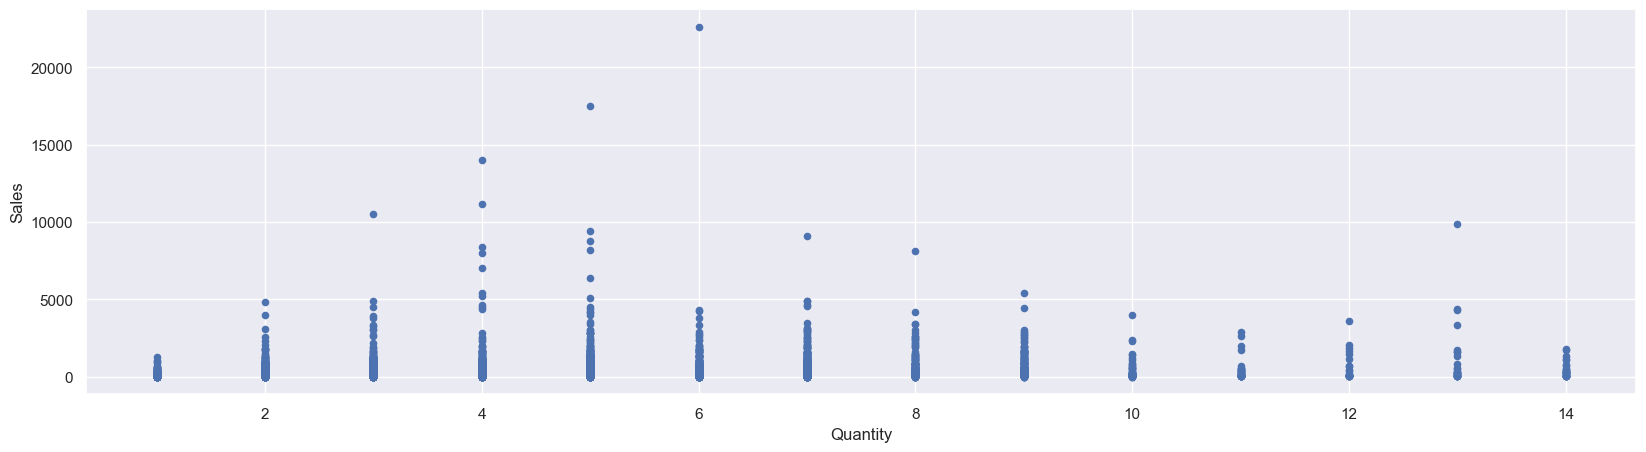

In [28]:
# compare below plot with the previous one
df.plot(x='Quantity', y='Sales', kind='scatter')

In [29]:
# define x and y by using the new dataframe
x = new_df['Profit']
y = new_df['Sales']

# Now Machine Learning

In [30]:
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [31]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (7995,)
X_test: (1999,)
Y_train: (7995,)
Y_test: (1999,)


In [33]:
# create a linear regression model
model = LinearRegression()

In [34]:
# train the model using training data
model.fit(x_train.values.reshape(-1,1), y_train)  

LinearRegression()

In [35]:
# print coefficient
model.coef_

array([1.19467205])

In [36]:
# print y_intercept | bias
model.intercept_

192.68099280327797

In [37]:
# make predictions using test data
y_pred = model.predict(x_test.values.reshape(-1,1))

In [38]:
# let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  313220.68675020145


In [39]:
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  559.6612249836516


In [40]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  247.08976392443108


In [41]:
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  0.3600113447730622


In [42]:
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)

MSE -->  313220.68675020145
RMSE -->  559.6612249836516
MAE -->  247.08976392443108
R2 -->  0.3600113447730622


Text(0, 0.5, 'Predicted')

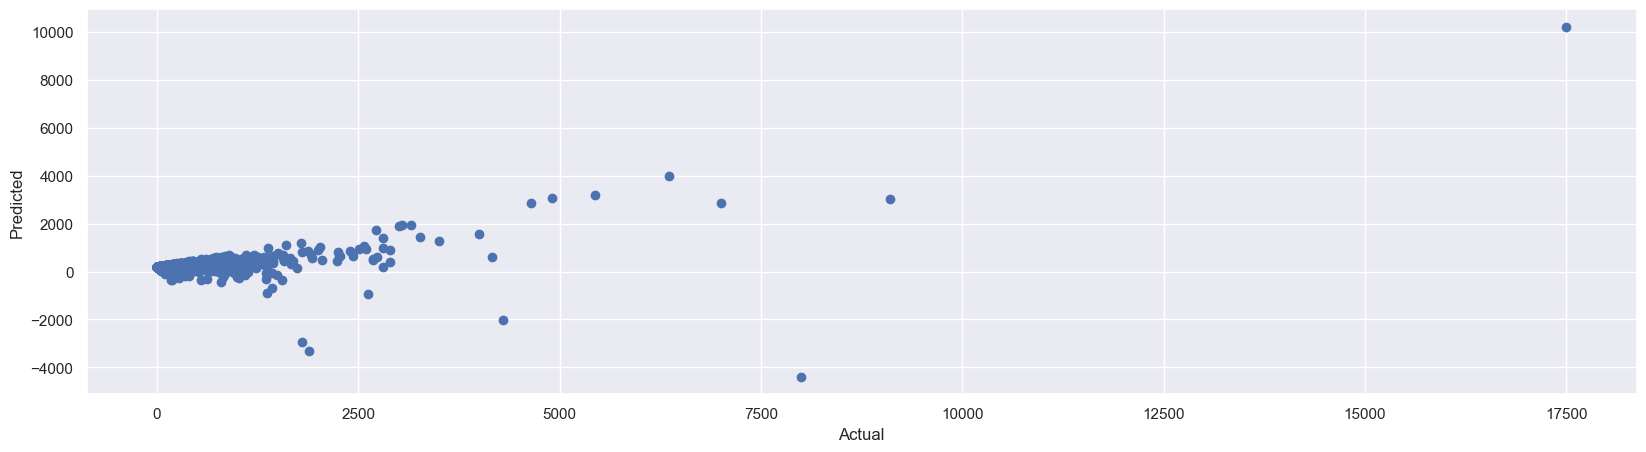

In [43]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Profit', ylabel='Sales'>

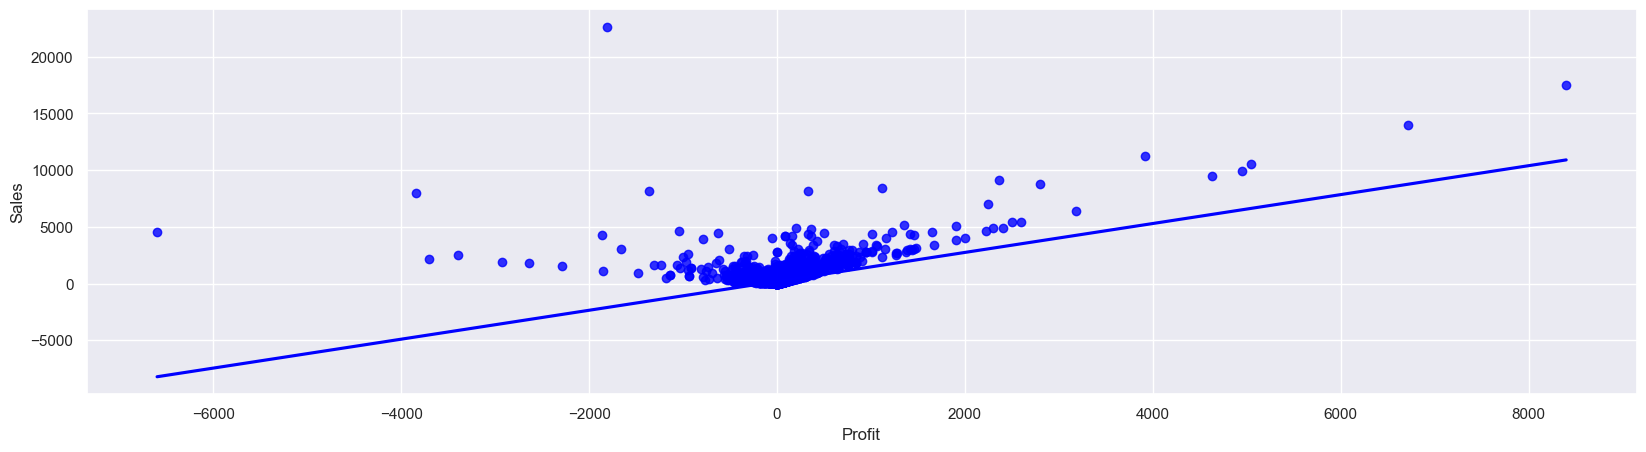

In [44]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')

# What about other independent variables?

<Axes: xlabel='Discount', ylabel='Profit'>

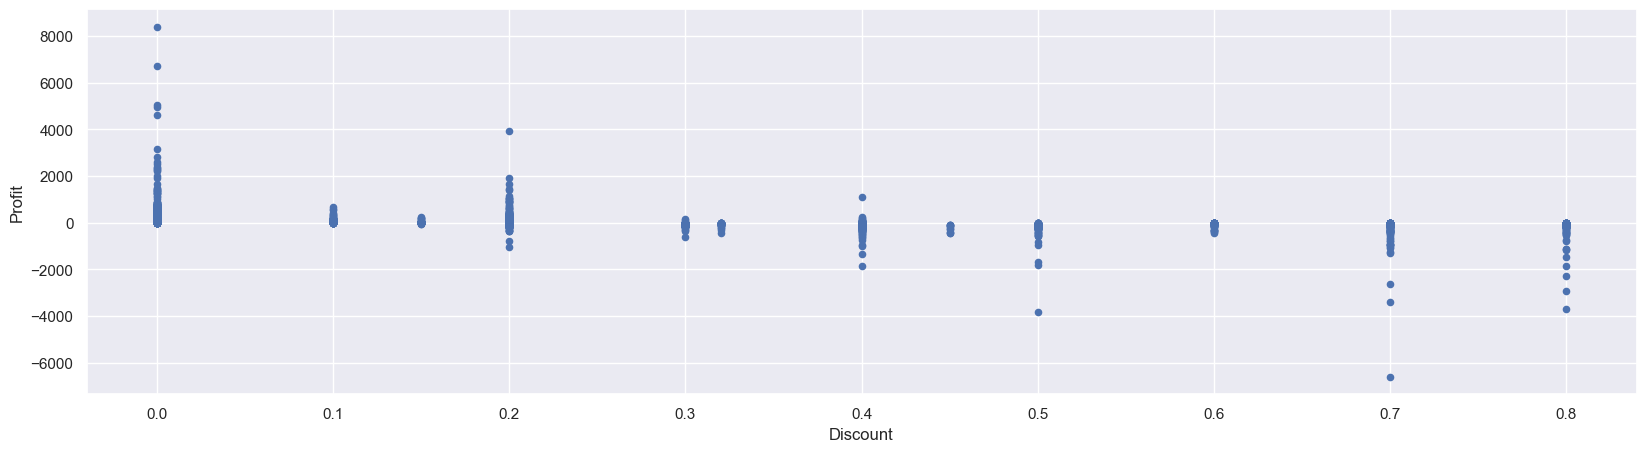

In [45]:
# plot Order ID - Profit distribution
df.plot(x='Discount', y='Profit', kind='scatter')

In [46]:
# new x will be X1 and X2
x = df[['Discount', 'Profit']]
x

,Discount,Profit
0,0.00,41.9136
1,0.00,219.5820
2,0.00,6.8714
3,0.45,-383.0310
4,0.20,2.5164
...,...,...
9989,0.20,4.1028
9990,0.00,15.6332
9991,0.20,19.3932
9992,0.00,13.3200


In [47]:
# y will be same
y

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

In [48]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [49]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (7995, 2)
X_test: (1999, 2)
Y_train: (7995,)
Y_test: (1999,)


In [50]:
# create a linear regression model
model = LinearRegression()

In [51]:
# train the model using training data
model.fit(x_train, y_train)

LinearRegression()

In [52]:
# print coefficients
model.coef_

array([232.22895702,   1.24516065])

In [53]:
# print y_intercept | bias
model.intercept_

155.03443925597824

In [54]:
# make predictions using test data
y_pred = model.predict(x_test)

In [55]:
# let's calculate the metrics
mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = math.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

In [56]:
# print them all
print("MSE --> ", mse_2)
print("RMSE --> ", rmse_2)
print("MAE --> ", mae_2)
print("R2 --> ", r2_2)

MSE -->  309665.29732513486
RMSE -->  556.4757832333181
MAE -->  244.72789106709286
R2 -->  0.3672758997440789


Text(0, 0.5, 'Predicted')

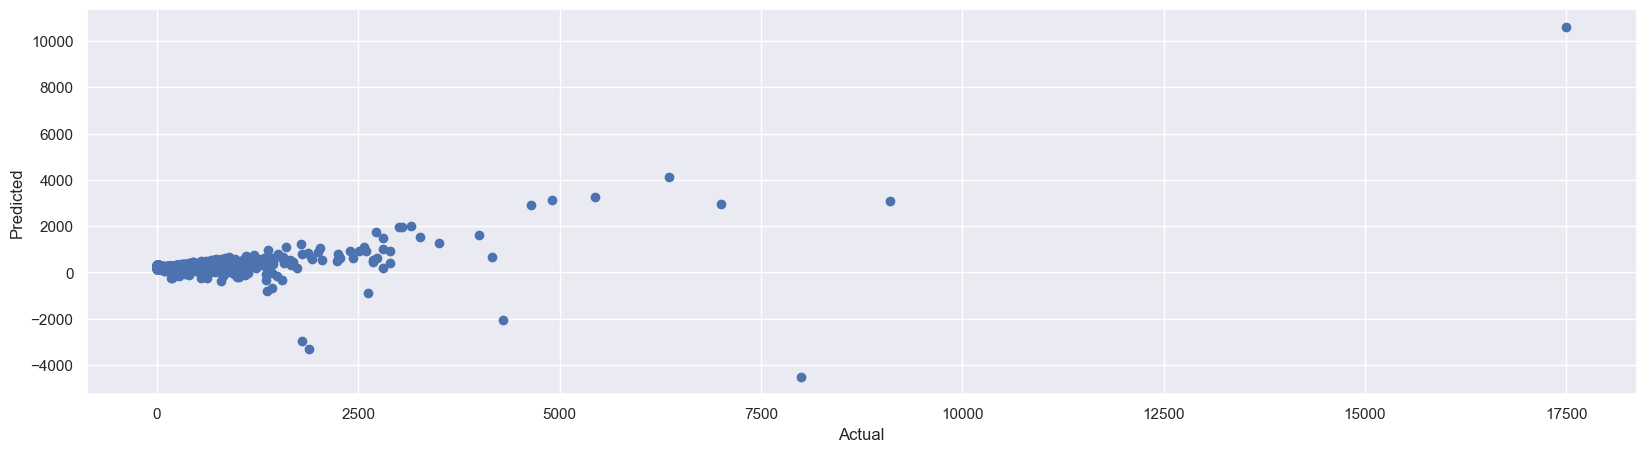

In [57]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Sales'>

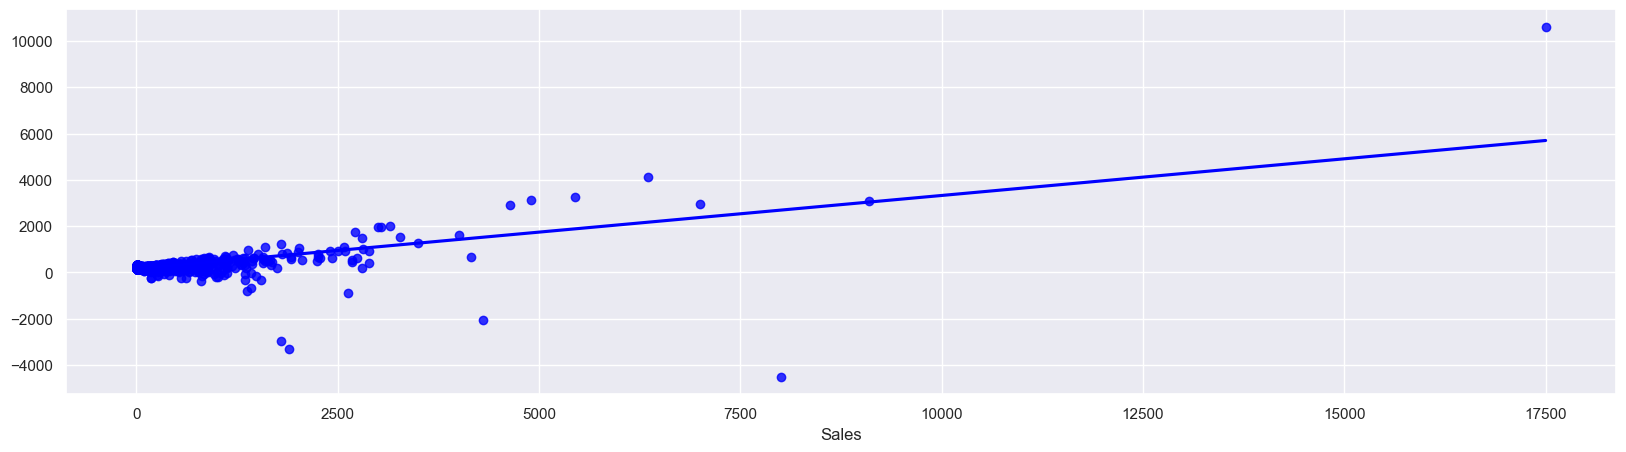

In [58]:
# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')

# Let's compare the metrics of two models

In [59]:
# create a metrics dataframe using metric values
metrics = {
    'Model': ['First', 'Second'],
    'MSE' : [mse, mse_2],
    'RMSE' : [rmse, rmse_2],
    'MAE' : [mae, mae_2],
    'R2' : [r2, r2_2]
    }

metrics_df = pd.DataFrame(data=metrics)

In [60]:
# compare the values
metrics_df

,Model,MSE,RMSE,MAE,R2
0,First,313220.686750,559.661225,247.089764,0.360011
1,Second,309665.297325,556.475783,244.727891,0.367276
